In [149]:
# Importing the relevant libraries for EDA and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(style='white')
%matplotlib inline
from scipy import stats
plt.style.use("ggplot")

# Importing relevant libraries for machine learning modeling & confusion matrices
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [150]:
# Loading the data
df = pd.read_csv('data/Terry_Stops_20240826.csv')

# Checking the first few rows of the data
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20160000398323,208373,Offense Report,NaN,4852,1953,M,Asian,...,15:18:00.0000000,TRESPASS,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
1,18 - 25,-1,20180000227180,559146,Citation / Infraction,NaN,5472,1964,M,Asian,...,00:07:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--TRAFFIC - BICYCLE VIOLATION,911,SOUTHWEST PCT - 3RD WATCH - F/W RELIEF,N,N,Southwest,F,F3
2,18 - 25,-1,20180000410091,498246,Offense Report,NaN,6081,1962,M,White,...,02:56:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - BOY (JOHN) - PLATOON 1,N,N,North,B,B1
3,-,-1,20160000001637,146742,Field Contact,NaN,6924,1974,M,White,...,01:44:00.0000000,-,-,-,EAST PCT OPS - NIGHT ACT,N,N,East,C,C1
4,46 - 55,-1,20150000006037,104477,Field Contact,NaN,6732,1975,M,White,...,02:59:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,North,B,B2


In [151]:
# Checking the number of rows and columns of the data
df.shape

(61009, 23)

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). Each row represents a unique stop.

Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes.

This data contains 61009 entries with 23 columns. It is obtained from City of Seattle on https://data.seattle.gov/Public-Safety/Terry-Stops.

# Column Names and Descriptions
The following descriptions were provided by data.seattle.gov
This dataset contains the following data:

**Subject Age Group**: Subject Age Group (10 year increments) as reported by the officer.

**Subject ID**: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO / SC Num**: General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID**: Key identifying unique Terry Stop reports.

**Stop Resolution**: Resolution of the stop as reported by the officer.

**Weapon Type**: Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID**: Key identifying unique officers in the dataset.

**Officer YOB**: Year of birth, as reported by the officer.

**Officer Gender**: Gender of the officer, as reported by the officer.

**Officer Race**: Race of the officer, as reported by the officer.

**Subject Perceived Race**: Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender**: Perceived gender of the subject, as reported by the officer.

**Reported Date**: Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time**: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type**: Initial classification of the call as assigned by 911.

**Final Call Type**: Final classification of the call as assigned by the primary officer closing the event.

**Call Type**: How the call was received by the communication center.

**Officer Squad**: Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag**: Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag**: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct**: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector**: Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat**: Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

In [152]:
# Getting a closer look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61009 entries, 0 to 61008
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61009 non-null  object
 1   Subject ID                61009 non-null  int64 
 2   GO / SC Num               61009 non-null  int64 
 3   Terry Stop ID             61009 non-null  int64 
 4   Stop Resolution           61009 non-null  object
 5   Weapon Type               28444 non-null  object
 6   Officer ID                61009 non-null  object
 7   Officer YOB               61009 non-null  int64 
 8   Officer Gender            61009 non-null  object
 9   Officer Race              61009 non-null  object
 10  Subject Perceived Race    61009 non-null  object
 11  Subject Perceived Gender  61009 non-null  object
 12  Reported Date             61009 non-null  object
 13  Reported Time             61009 non-null  object
 14  Initial Call Type     

The data types of the columns are as follows:

## Column Classification
### Numerical Columns:
Subject ID,
GO / SC Num,
Terry Stop ID,
Officer YOB,

### Categorical Columns:
Subject Age Group,
Stop Resolution,
Weapon Type,
Officer ID,
Officer Gender,
Officer Race,
Subject Perceived Race,
Subject Perceived Gender,
Reported Date,
Reported Time,
Initial Call Type,
Final Call Type,
Call Type,
Officer Squad,
Arrest Flag,
Frisk Flag,
Precinct,
Sector,
Beat,

In [153]:
# Checking for missing values in the dataset
df.isnull().sum()

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 561
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64

Here we can clearly see that the Weapon Type feature has a lot of values missing and also the Office Squad as well has 561 missing values. Still yet we need to check the dataset in depth to learn if there are any place holders, none or other unnecessary values/Characters.

In [154]:
# Creating a function that shows the value counts of each column in the dataset.
def col_values(df):
    """
    For use in Preprocessing and cleaning to find placeholder values
    Input: Data frame
    Output: Counts of unique values for each column
    """
    for col in df.columns:
        print(df[col].value_counts())
        print('-------------------------------------------------------')
        
col_values(df)

Subject Age Group
26 - 35         20373
36 - 45         13618
18 - 25         11573
46 - 55          7738
56 and Above     3221
1 - 17           2286
-                2200
Name: count, dtype: int64
-------------------------------------------------------
Subject ID
-1              35104
 7753260438        28
 7774286580        22
 7726918259        21
 7731717691        20
                ...  
 15606702593        1
 7735943699         1
 7738872582         1
 16724979306        1
 19137661313        1
Name: count, Length: 17000, dtype: int64
-------------------------------------------------------
GO / SC Num
20160000378750    16
20150000190790    16
20180000134604    14
20210000267148    14
20230000049052    14
                  ..
20150000006142     1
20180000000272     1
20200000339446     1
20220000283906     1
20220000018102     1
Name: count, Length: 48845, dtype: int64
-------------------------------------------------------
Terry Stop ID
32633045284    3
19324329995    3
19268585

In [155]:
# For ease of use let us rename the columns
df.columns = ['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat']

df.columns

Index(['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_yob',
       'officer_gender', 'officer_race', 'subject_perceived_race',
       'subject_perceived_gender', 'reported_date', 'reported_time',
       'initial_call_type', 'final_call_type', 'call_type', 'officer_squad',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat'],
      dtype='object')

In [156]:
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,36 - 45,-1,20160000398323,208373,Offense Report,NaN,4852,1953,M,Asian,...,15:18:00.0000000,TRESPASS,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
1,18 - 25,-1,20180000227180,559146,Citation / Infraction,NaN,5472,1964,M,Asian,...,00:07:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--TRAFFIC - BICYCLE VIOLATION,911,SOUTHWEST PCT - 3RD WATCH - F/W RELIEF,N,N,Southwest,F,F3
2,18 - 25,-1,20180000410091,498246,Offense Report,NaN,6081,1962,M,White,...,02:56:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - BOY (JOHN) - PLATOON 1,N,N,North,B,B1
3,-,-1,20160000001637,146742,Field Contact,NaN,6924,1974,M,White,...,01:44:00.0000000,-,-,-,EAST PCT OPS - NIGHT ACT,N,N,East,C,C1
4,46 - 55,-1,20150000006037,104477,Field Contact,NaN,6732,1975,M,White,...,02:59:00.0000000,-,-,-,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,North,B,B2


## Data cleaning
Let us clean the data before we proceed to processing. Let us start by replacing the dashes and place holders with the more workable values first. Then we will go on to the more complex cleaning process.

In [157]:
# Replacing the dashes with Unknown
df = df.replace('-', 'Unknown')
df.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,36 - 45,-1,20160000398323,208373,Offense Report,NaN,4852,1953,M,Asian,...,15:18:00.0000000,TRESPASS,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 2ND W - LINCOLN - PLATOON 1,N,N,North,L,L3
1,18 - 25,-1,20180000227180,559146,Citation / Infraction,NaN,5472,1964,M,Asian,...,00:07:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--TRAFFIC - BICYCLE VIOLATION,911,SOUTHWEST PCT - 3RD WATCH - F/W RELIEF,N,N,Southwest,F,F3
2,18 - 25,-1,20180000410091,498246,Offense Report,NaN,6081,1962,M,White,...,02:56:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,NORTH PCT 3RD W - BOY (JOHN) - PLATOON 1,N,N,North,B,B1
3,Unknown,-1,20160000001637,146742,Field Contact,NaN,6924,1974,M,White,...,01:44:00.0000000,Unknown,Unknown,Unknown,EAST PCT OPS - NIGHT ACT,N,N,East,C,C1
4,46 - 55,-1,20150000006037,104477,Field Contact,NaN,6732,1975,M,White,...,02:59:00.0000000,Unknown,Unknown,Unknown,SOUTH PCT 3RD W - SAM - PLATOON 2,N,N,North,B,B2


Officer_gender has 30 'N' values. We cannot be sure if 'N' stands for 'Not Available', 'Not Disclosed', or even 'Non-Gender Binary'. Since it's such a small amount of data, we'll just drop it.

In [158]:
# Dropping the entries with 'N' values from the officer_gender column.
df = df[df['officer_gender']!= 'N']
df.officer_gender.value_counts()


officer_gender
M    54072
F     6907
Name: count, dtype: int64

Officer_squad also has some NAN values. Since this information is less relevant to this particular task, it is better to just drop the column.

In [159]:
# Dropping the officer_squad column and assigning the data to a copy data frame.
df_copy = df.drop('officer_squad', axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60979 entries, 0 to 61008
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         60979 non-null  object
 1   subject_id                60979 non-null  int64 
 2   go_sc_num                 60979 non-null  int64 
 3   terry_stop_id             60979 non-null  int64 
 4   stop_resolution           60979 non-null  object
 5   weapon_type               28419 non-null  object
 6   officer_id                60979 non-null  object
 7   officer_yob               60979 non-null  int64 
 8   officer_gender            60979 non-null  object
 9   officer_race              60979 non-null  object
 10  subject_perceived_race    60979 non-null  object
 11  subject_perceived_gender  60979 non-null  object
 12  reported_date             60979 non-null  object
 13  reported_time             60979 non-null  object
 14  initial_call_type         6

As we saw it above, there are some subject IDs that are repeated multiple times. This could be either duplicates or repeat offenders. So it is crucial to investigate that feature.

In [160]:
# Checking the subject_id column
df_copy['subject_id'].value_counts()

subject_id
-1              35095
 7753260438        28
 7774286580        22
 7726918259        21
 7731717691        20
                ...  
 15606702593        1
 7735943699         1
 7738872582         1
 16724979306        1
 19137661313        1
Name: count, Length: 16988, dtype: int64

In [161]:
# Creating a subset data to analyze the duplicated subject_ids
ids = df_copy[df_copy['subject_id'] > 3]
ids.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_date,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat
5,56 and Above,13311026420,20190000191730,8249396590,Offense Report,Unknown,6609,1971,M,White,...,2019-05-28T00:00:00Z,02:36:12.0000000,TRESPASS,--PROWLER - TRESPASS,"TELEPHONE OTHER, NOT 911",N,N,North,J,J2
10,46 - 55,7760485175,20190000367944,10558823890,Field Contact,Unknown,7691,1971,M,White,...,2019-10-02T00:00:00Z,13:25:26.0000000,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - D.U.I.,ONVIEW,N,N,South,O,O1
11,26 - 35,22923151712,20210000060779,21849547981,Arrest,Unknown,8609,1997,M,Two or More Races,...,2021-03-12T00:00:00Z,11:12:56.0000000,BURG - RESD (INCL UNOCC STRUCTURES ON PROP),--BURGLARY - RESIDENTIAL OCCUPIED,911,Y,Y,Unknown,Unknown,Unknown
12,56 and Above,7763651995,20220000218857,35755970288,Field Contact,Unknown,8883,1994,M,White,...,2022-08-18T00:00:00Z,21:33:24.0000000,ASLT - PERSON SHOT OR SHOT AT,"--ASSAULTS - HARASSMENT, THREATS",911,N,N,South,S,S2
13,46 - 55,7725466641,20190000185619,8244604428,Arrest,Unknown,8336,1987,M,Hispanic or Latino,...,2019-05-23T00:00:00Z,13:39:21.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,Y,N,East,E,E2


In [162]:
ids.shape

(25882, 22)

The identity might affect the model if people arrested were repeat offenders

In [163]:
# Checking for repeat offenders
ids = ids[ids['arrest_flag'] == 'Y']
ids.shape

(6579, 22)

In [164]:
# Further check
ids = ids[ids['subject_id'] == 7753260438]
ids

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_date,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat
3154,36 - 45,7753260438,20230000052526,43273447949,Arrest,Unknown,8728,1997,M,White,...,2023-02-24T00:00:00Z,09:46:50.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--WARRANT SERVICES - FELONY,ONVIEW,Y,N,West,M,M3
8877,26 - 35,7753260438,20190000455108,12042241534,Arrest,Unknown,8675,1994,M,White,...,2019-12-09T00:00:00Z,11:29:41.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,Y,N,West,M,M3
10627,36 - 45,7753260438,20230000133620,49797224743,Arrest,Knife/Cutting/Stabbing Instrument,8899,1993,M,Two or More Races,...,2023-05-16T00:00:00Z,08:32:46.0000000,TRESPASS,--PROWLER - TRESPASS,911,Y,Y,West,K,K1
17513,36 - 45,7753260438,20230000170348,51057591608,Arrest,Unknown,8855,1999,F,White,...,2023-06-19T00:00:00Z,04:59:55.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,Y,N,West,M,M3
21610,26 - 35,7753260438,20190000482027,12132534725,Arrest,Blunt Object/Striking Implement,8567,1989,F,White,...,2019-12-31T00:00:00Z,06:06:18.0000000,OBS - BURG - IP/JO - COMM BURG (INCLUDES SCHOOLS),--PROPERTY DEST (DAMG),911,Y,Y,West,M,M1
33455,26 - 35,7753260438,20200000303032,16312721216,Arrest,Unknown,7690,1977,M,White,...,2020-10-25T00:00:00Z,13:12:28.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,Y,N,West,M,M1
40500,26 - 35,7753260438,20200000295113,16099471126,Arrest,Unknown,8709,1997,F,White,...,2020-10-16T00:00:00Z,11:24:21.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--PROWLER - TRESPASS,ONVIEW,Y,N,West,M,M3
43059,26 - 35,7753260438,20210000144480,25538231361,Arrest,Unknown,8774,1900,M,Unknown,...,2021-06-11T00:00:00Z,11:15:08.0000000,ASLT - CRITICAL (NO SHOOTINGS),"--ASSAULTS, OTHER",911,Y,Y,East,E,E3
54633,26 - 35,7753260438,20200000077738,12683924897,Arrest,Unknown,8636,1989,M,Two or More Races,...,2020-03-02T00:00:00Z,07:30:11.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--BURGLARY - NON RESIDENTIAL/COMMERCIAL,ONVIEW,Y,N,West,M,M3
55977,26 - 35,7753260438,20200000125741,12906891174,Arrest,Knife/Cutting/Stabbing Instrument,8636,1989,M,Two or More Races,...,2020-04-15T00:00:00Z,06:09:26.0000000,TRESPASS,--PROWLER - TRESPASS,ONVIEW,Y,Y,West,M,M3


These incidents happen to have different stop ids, dates, officer ids etc. This assures us that they are separate incidents and shouldn't affect our model. However we still need to identify if our dataset contains repeat offenders(people who have been stopped numerous times).

In [165]:
# Checking for repeat offenders
df_copy['repeat_offenders'] = np.nan
for i in range(len(df_copy['subject_id'])):
    """"
    Check if the subject_id is greater than 1 (indicating a repeat offender)
    If so, assign 'Yes' to the repeat_offenders column, else 'No'
    This will help us to identify if the dataset contains repeat offenders or not.
    Note: We are assuming that a repeat offender is someone who has been stopped more than once.
    If you want to define repeat offenders differently, you can modify this condition accordingly.
    df_copy['repeat_offenders'].iloc[i] = 'Yes' if df_copy['subject_id'].iloc[i] > 1 else 'No'
    The above condition checks if the subject_id is greater than 1 (indicating a repeat offender)
    But if you want to check if the subject_id appears more than once in the dataset (not just more than once in the Terry Stop data),
    you can use the following condition instead:
    df_copy['repeat_offenders'].iloc[i] = 'Yes' if df_copy['subject_id'].value_counts().loc[df_copy['subject_id'].iloc[i]] > 1 else 'No'
   """
    if df_copy['subject_id'].iloc[i] > 1:
        df_copy['repeat_offenders'].iloc[i] = 'Yes'
    else:
        df_copy['repeat_offenders'].iloc[i] = 'No'
        
df_copy['repeat_offenders'].value_counts()

repeat_offenders
No     35097
Yes    25882
Name: count, dtype: int64

In [166]:
# Let us replace those -1 values in 'Subject_ID' with 'unassigned'
df_copy['subject_id'] = df_copy['subject_id'].replace(-1, 'unassigned')
df_copy.subject_id.value_counts()

subject_id
unassigned     35095
7753260438        28
7774286580        22
7726918259        21
7731717691        20
               ...  
15606702593        1
7735943699         1
7738872582         1
16724979306        1
19137661313        1
Name: count, Length: 16988, dtype: int64

In [167]:
# Investigating the repeated values in the go_sc_num column
stops = df_copy[df_copy['go_sc_num'] > 1]
stops['go_sc_num'].value_counts()

go_sc_num
20150000190790    16
20160000378750    16
20210000267148    14
20230000049052    14
20180000134604    14
                  ..
20170000388048     1
20190000000565     1
20190000341769     1
20190000142956     1
20220000018102     1
Name: count, Length: 48826, dtype: int64

In [168]:
stops = stops[stops['go_sc_num'] == 20160000378750]
stops

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
5940,46 - 55,unassigned,20160000378750,208306,Offense Report,NaN,7492,1983,M,White,...,22:45:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
11366,36 - 45,unassigned,20160000378750,208312,Offense Report,NaN,7492,1983,M,White,...,23:08:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
13031,26 - 35,unassigned,20160000378750,208300,Offense Report,NaN,7492,1983,M,White,...,22:22:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
33240,36 - 45,unassigned,20160000378750,208314,Arrest,NaN,7492,1983,M,White,...,23:15:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
33810,46 - 55,unassigned,20160000378750,208309,Arrest,NaN,7492,1983,M,White,...,22:54:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
36586,46 - 55,unassigned,20160000378750,208304,Offense Report,NaN,7492,1983,M,White,...,22:39:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
36631,36 - 45,unassigned,20160000378750,208299,Offense Report,NaN,7492,1983,M,White,...,22:18:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
39754,26 - 35,unassigned,20160000378750,208307,Offense Report,NaN,7492,1983,M,White,...,22:48:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
41484,26 - 35,unassigned,20160000378750,208301,Offense Report,NaN,7492,1983,M,White,...,22:24:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No
43337,18 - 25,unassigned,20160000378750,208311,Arrest,NaN,7492,1983,M,White,...,23:04:00.0000000,Unknown,Unknown,Unknown,N,Y,North,N,N3,No


Taking into account the dates, the separate Terry Stop ID's, the different Stop Resolutions and it all roughly happening within the same hour, it appears that this was a **dispute** of some sort in which an officer **collected Offense Reports from 12 people** and issued out **tickets to 4 people** (because there was **no physical arrest** denoted by the column 'arrest_flag', these were **non-custodial** arrests/citations).  

Looking back at the Column Description document, the GO/SC Number is considered the **"parent report"** that contain **associated Terry Stops**. This confirms my observations.

**Terry Stop ID** also has some duplicate values worth checking.

In [169]:
# Checking terry stop id value counts
df_copy['terry_stop_id'].value_counts()

terry_stop_id
19324329995    3
19268585233    3
27511831225    3
36014210659    3
32633045284    3
              ..
87443          1
108886         1
274766         1
12093615563    1
31342435997    1
Name: count, Length: 60877, dtype: int64

In [170]:
# Listing the duplicates
dup_ids = df_copy[df_copy['terry_stop_id'].duplicated(keep=False)].sort_values(by = 'terry_stop_id')
# dup_ids = dup_ids[['subject_age_group', 'subject_id', 'go_sc_num', 
#                    'terry_stop_id', 'stop_resolution', 'weapon_type',
#                    'officer_id', 'reported_date', 'reported_time',
#                    'initial_call_type', 'final_call_type', 'arrest_flag',
#                    'frisk_flag', ]]
dup_ids

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
52,26 - 35,7810387129,20190000254490,8611673538,Field Contact,Knife/Cutting/Stabbing Instrument,7712,1987,M,White,...,01:09:47.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,N,Y,Unknown,Unknown,Unknown,Yes
43012,26 - 35,7810387129,20190000254490,8611673538,Field Contact,Blunt Object/Striking Implement,7712,1987,M,White,...,01:09:47.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,N,Y,Unknown,Unknown,Unknown,Yes
14583,26 - 35,7730805128,20190000268604,8677596250,Offense Report,Taser/Stun Gun,5630,1964,M,Black or African American,...,10:27:54.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,911,N,Y,Southwest,F,F2,Yes
8805,26 - 35,7730805128,20190000268604,8677596250,Offense Report,Knife/Cutting/Stabbing Instrument,5630,1964,M,Black or African American,...,10:27:54.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - CAR PROWL,911,N,Y,Southwest,F,F2,Yes
19773,18 - 25,9458419522,20190000285750,9585545373,Field Contact,Handgun,8382,1993,M,White,...,22:50:59.0000000,ASLT - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,N,Y,East,E,E3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20234,26 - 35,53848066671,20240000133855,56110860878,Arrest,Knife/Cutting/Stabbing Instrument,8846,1997,M,Black or African American,...,11:14:27.0000000,DISTURBANCE,"--ASSAULTS, OTHER",911,Y,Y,North,B,B1,Yes
46922,36 - 45,57754429915,20240000198136,57754515446,Arrest,Knife/Cutting/Stabbing Instrument,8584,1982,M,White,...,11:15:20.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--BURGLARY - NON RESIDENTIAL/COMMERCIAL,"TELEPHONE OTHER, NOT 911",Y,Y,South,O,O1,Yes
42736,36 - 45,57754429915,20240000198136,57754515446,Arrest,Blunt Object/Striking Implement,8584,1982,M,White,...,11:15:20.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--BURGLARY - NON RESIDENTIAL/COMMERCIAL,"TELEPHONE OTHER, NOT 911",Y,Y,South,O,O1,Yes
9130,18 - 25,7741755512,20240000210107,57961741719,Arrest,Taser/Stun Gun,8897,1987,M,White,...,05:21:37.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--BURGLARY - NON RESIDENTIAL/COMMERCIAL,911,Y,Y,East,G,G1,Yes


In [171]:
# Taking a closer look
dup_ids = dup_ids[dup_ids['terry_stop_id'] == 9585545373]
dup_ids

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
19773,18 - 25,9458419522,20190000285750,9585545373,Field Contact,Handgun,8382,1993,M,White,...,22:50:59.0000000,ASLT - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,N,Y,East,E,E3,Yes
26039,18 - 25,9458419522,20190000285750,9585545373,Field Contact,Firearm,8382,1993,M,White,...,22:50:59.0000000,ASLT - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,N,Y,East,E,E3,Yes


We can infer from this data that these represent a **single person** who was carrying **multiple weapon types** and the officer had to **create separate entries for each weapon**.

This could be a problem, as it inflates the number of stops.  Since the incidents of such values are few, it is better to drop the duplicates and keep the first instance. This will also **clean up** any people that are **wrongfully classified as 'Repeat Offenders'**.

In [172]:
# Dropping the duplicates and keeping the first instance
df_copy = df_copy.drop_duplicates('terry_stop_id', keep='first').sort_values(by = 'terry_stop_id')
df_copy

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders
5536,1 - 17,unassigned,20150000084533,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,M,Hispanic or Latino,...,16:10:00.0000000,Unknown,Unknown,Unknown,N,Y,East,G,G2,No
34249,36 - 45,unassigned,20150000001428,28092,Field Contact,NaN,7634,1977,M,White,...,05:49:00.0000000,Unknown,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No
22176,18 - 25,unassigned,20150000001428,28093,Field Contact,NaN,7634,1977,M,White,...,05:55:00.0000000,Unknown,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No
46800,26 - 35,unassigned,20150000001437,28381,Field Contact,NaN,7634,1977,M,White,...,10:38:00.0000000,Unknown,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No
35165,36 - 45,unassigned,20150000087329,28462,Offense Report,NaN,7634,1977,M,White,...,11:46:00.0000000,SUICIDE - CRITICAL,--CRISIS COMPLAINT - GENERAL,"TELEPHONE OTHER, NOT 911",N,Y,East,E,E3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8952,18 - 25,33970989734,20240000173704,58505996345,Field Contact,Handgun,6848,1978,M,White,...,09:44:14.0000000,Unknown,Unknown,Unknown,N,Y,West,K,K3,Yes
43019,1 - 17,7734651568,20240000173704,58506837543,Field Contact,Unknown,6848,1978,M,White,...,11:33:58.0000000,Unknown,Unknown,Unknown,N,Y,West,K,K3,Yes
31174,1 - 17,53252554865,20240000173704,58506902793,Field Contact,Unknown,6848,1978,M,White,...,11:43:37.0000000,Unknown,Unknown,Unknown,N,Y,West,K,K3,Yes
32618,26 - 35,7729016487,20240000238040,58508727659,Field Contact,Unknown,8564,1987,M,Hispanic or Latino,...,15:55:53.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,N,Y,North,B,B1,Yes


## Report Date
Ok so now lets remove the timestamp from date, create a new columns "incident year" and "incident month" and drop the reported date.

In [173]:
# Checking the column reported date
df_copy.reported_date.dtype, df_copy.reported_date.head()

(dtype('O'),
 5536     2015-03-15T00:00:00Z
 34249    2015-03-16T00:00:00Z
 22176    2015-03-16T00:00:00Z
 46800    2015-03-17T00:00:00Z
 35165    2015-03-17T00:00:00Z
 Name: reported_date, dtype: object)

In [174]:
# Converting to date time format
df_copy['reported_date'] = pd.to_datetime(df_copy['reported_date'])

# Creating a new column with the year of the incident
df_copy['incident_year'] = df_copy['reported_date'].dt.year

# Creating a new column with the month of the incident
df_copy['incident_month'] = df_copy['reported_date'].dt.month

# Dropping the reported date column
df_copy = df_copy.drop('reported_date', axis=1)
df_copy.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,final_call_type,call_type,arrest_flag,frisk_flag,precinct,sector,beat,repeat_offenders,incident_year,incident_month
5536,1 - 17,unassigned,20150000084533,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,M,Hispanic or Latino,...,Unknown,Unknown,N,Y,East,G,G2,No,2015,3
34249,36 - 45,unassigned,20150000001428,28092,Field Contact,NaN,7634,1977,M,White,...,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No,2015,3
22176,18 - 25,unassigned,20150000001428,28093,Field Contact,NaN,7634,1977,M,White,...,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No,2015,3
46800,26 - 35,unassigned,20150000001437,28381,Field Contact,NaN,7634,1977,M,White,...,Unknown,Unknown,N,N,Unknown,Unknown,Unknown,No,2015,3
35165,36 - 45,unassigned,20150000087329,28462,Offense Report,NaN,7634,1977,M,White,...,--CRISIS COMPLAINT - GENERAL,"TELEPHONE OTHER, NOT 911",N,Y,East,E,E3,No,2015,3


In [175]:
# Calculating officers' age
df_copy['officer_age'] = df_copy['incident_year'] - df_copy['officer_yob']
df_copy['officer_age']
# Now let's convert the 'officer_race' and'subject_perceived_race' columns to a more meaningful format.

5536     60
34249    38
22176    38
46800    38
35165    38
         ..
8952     46
43019    46
31174    46
32618    37
12853    33
Name: officer_age, Length: 60877, dtype: int64

Let us now proceed to the stop resolution. From common knowledge, we know that any arrest which is not flagged as one in the appropriate column is considered a "non-custodial arrest" or an instance where a citation was issued. 

In [176]:
# Checking the stop resolution
df_copy['stop_resolution'].value_counts()

stop_resolution
Field Contact               29479
Offense Report              15713
Arrest                      14739
Referred for Prosecution      728
Citation / Infraction         218
Name: count, dtype: int64

Even though this column tells us what happened after the incident, the `Field Contact` and `Offense Report` values do give us insight as to why an officer may have initiated a stop. So let us create columns for these values and drop the stop resolution column.

In [177]:
# Creating field_contact column that contains 'y' and 'n' values
df_copy['field_contact'] = df_copy['stop_resolution'].str.contains('Field Contact')
df_copy['field_contact'] = df_copy['field_contact'].map({True: 'y', False: 'n'})

# Creating offense_report column that contains 'y' and 'n' values
df_copy['offense_report'] = df_copy['stop_resolution'].str.contains('Offense Report')
df_copy['offense_report'] = df_copy['offense_report'].map({True: 'y', False: 'n'})

df_copy.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,frisk_flag,precinct,sector,beat,repeat_offenders,incident_year,incident_month,officer_age,field_contact,offense_report
5536,1 - 17,unassigned,20150000084533,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,M,Hispanic or Latino,...,Y,East,G,G2,No,2015,3,60,n,n
34249,36 - 45,unassigned,20150000001428,28092,Field Contact,NaN,7634,1977,M,White,...,N,Unknown,Unknown,Unknown,No,2015,3,38,y,n
22176,18 - 25,unassigned,20150000001428,28093,Field Contact,NaN,7634,1977,M,White,...,N,Unknown,Unknown,Unknown,No,2015,3,38,y,n
46800,26 - 35,unassigned,20150000001437,28381,Field Contact,NaN,7634,1977,M,White,...,N,Unknown,Unknown,Unknown,No,2015,3,38,y,n
35165,36 - 45,unassigned,20150000087329,28462,Offense Report,NaN,7634,1977,M,White,...,Y,East,E,E3,No,2015,3,38,n,y


In [178]:
# Checking our new columns
df_copy.offense_report.value_counts(), df_copy.field_contact.value_counts()

(offense_report
 n    45164
 y    15713
 Name: count, dtype: int64,
 field_contact
 n    31398
 y    29479
 Name: count, dtype: int64)

The weapon type column contains a lot of redundant values. Let us clean it up and organize it well.

In [179]:
# Checking the weapon type column
df_copy['weapon_type'].value_counts()

weapon_type
Unknown                                 24546
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument        1293
Handgun                                   384
Blunt Object/Striking Implement           150
Firearm                                   102
Firearm Other                             100
Other Firearm                              73
Club, Blackjack, Brass Knuckles            49
Mace/Pepper Spray                          48
None/Not Applicable                        18
Firearm (unk type)                         15
Taser/Stun Gun                             14
Fire/Incendiary Device                     12
Rifle                                      10
Club                                        9
Shotgun                                     5
Personal Weapons (hands, feet, etc.)        2
Automatic Handgun                           2
Brass Knuckles                              1
Blackjack                                   1
Poison                

In [180]:
# Weapon type categories
none = ['None/Not Applicable']

knife = ['Lethal Cutting Instrument', 'Knife/Cutting/Stabbing Instrument']

blunt_obj = ['Club, Blackjack, Brass Knuckles', 'Club', 'Blackjack', 'Brass Knuckles']
firearm = ['Firearm Other', 'Firearm (unk type)', 'Other Firearm', 'Rifle', 
          'Shotgun', 'Automatic Handgun', 'Handgun']
other = ['Taser/Stun Gun', 'Mace/Pepper Spray', 'Fire/Incendiary Device']

# Creating a function called replace_val that takes the source data, column name, old name and a new name
def replace_val(df, col, old_val, new_val):
    for i in range(len(df[col])):
        for j in range(len(old_val)):
            if df[col].iloc[i] == old_val[j]:
                df[col].iloc[i] = df[col].iloc[i].replace(old_val[j], new_val)


# Applying the function to replace weapon type values
# replacing none
replace_val(df_copy, 'weapon_type', none, 'None')

# replacing knife
replace_val(df_copy, 'weapon_type', knife, 'Knife/Stabbing Instrument')

# replacing blunt object
replace_val(df_copy, 'weapon_type', blunt_obj, 'Blunt Object/Striking Implement')

# replacing firearm
replace_val(df_copy, 'weapon_type', firearm, 'Firearm')

# other
replace_val(df_copy, 'weapon_type', other, 'Other')

df_copy['weapon_type'].value_counts()

weapon_type
Unknown                                 24546
Knife/Stabbing Instrument                2775
Firearm                                   691
Blunt Object/Striking Implement           210
Other                                      74
None                                       18
Personal Weapons (hands, feet, etc.)        2
Poison                                      1
Name: count, dtype: int64

In [181]:
# Dropping the officer_yob column
df_copy = df_copy.drop('officer_yob', axis=1)
df_copy.columns

Index(['subject_age_group', 'subject_id', 'go_sc_num', 'terry_stop_id',
       'stop_resolution', 'weapon_type', 'officer_id', 'officer_gender',
       'officer_race', 'subject_perceived_race', 'subject_perceived_gender',
       'reported_time', 'initial_call_type', 'final_call_type', 'call_type',
       'arrest_flag', 'frisk_flag', 'precinct', 'sector', 'beat',
       'repeat_offenders', 'incident_year', 'incident_month', 'officer_age',
       'field_contact', 'offense_report'],
      dtype='object')

Let us tidy up the reported time column as well

In [182]:
# Converting the time column to datetime format and keeping only the hour assigning it to a new reported_hour column
df_copy['reported_time'] = pd.to_datetime(df_copy['reported_time'])
df_copy['reported_hour'] = df_copy['reported_time'].dt.hour
df_copy = df_copy.drop('reported_time', axis=1)
df_copy.reported_hour.head()

5536     16
34249     5
22176     5
46800    10
35165    11
Name: reported_hour, dtype: int32

In [183]:
# CHecking the copy dataframe so far
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60877 entries, 5536 to 12853
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         60877 non-null  object
 1   subject_id                60877 non-null  object
 2   go_sc_num                 60877 non-null  int64 
 3   terry_stop_id             60877 non-null  int64 
 4   stop_resolution           60877 non-null  object
 5   weapon_type               28317 non-null  object
 6   officer_id                60877 non-null  object
 7   officer_gender            60877 non-null  object
 8   officer_race              60877 non-null  object
 9   subject_perceived_race    60877 non-null  object
 10  subject_perceived_gender  60877 non-null  object
 11  initial_call_type         60877 non-null  object
 12  final_call_type           60877 non-null  object
 13  call_type                 60877 non-null  object
 14  arrest_flag             

Moving on let us work with the call types column. There are 13000+ entries in this column with an 'unknown' values which indicates that these instances were not put in the CAD system. This creates a major problem since it gives as a stop instance for no identifiable reasons. It is therefore better to drop these instances as we cannot assume the call types.

In [184]:
# Checking the call types column
df_copy['initial_call_type'].value_counts()

initial_call_type
Unknown                                       13444
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW     4772
SUSPICIOUS PERSON, VEHICLE, OR INCIDENT        4203
DISTURBANCE                                    3061
ASLT - CRITICAL (NO SHOOTINGS)                 2704
                                              ...  
-ASSIGNED DUTY - STAKEOUT                         1
REQUEST TO WATCH                                  1
ESCAPE - PRISONER                                 1
ANIMAL BITE                                       1
EXPLOSION                                         1
Name: count, Length: 181, dtype: int64

ESCAPE - PRISONER, PHONE - OBSCENE OR NUISANCE PHONE CALLS, EXPLOSION, ORDER - ASSIST DV VIC W/SRVC OF COURT ORDER, ASSIGNED DUTY - STAKEOUT, TEXT MESSAGE and SCHEDULED EVENT (RECURRING) all of these have very small values, it is better to drop them as well.

In [185]:
# Dropping the unknown call types and the ones with small values
df_copy = df_copy[(df_copy['call_type'] != 'Unknown')&
                  (df_copy['call_type'] != 'ESCAPE - PRISONER')&
                  (df_copy['call_type'] != 'PHONE - OBSCENE OR NUISANCE PHONE CALLS')&
                  (df_copy['call_type'] != 'EXPLOSION')&
                  (df_copy['call_type'] != 'ORDER - ASSIST DV VIC W/SRVC OF COURT ORDER')&
                  (df_copy['call_type'] != 'ASSIGNED DUTY - STAKEOUT')&
                  (df_copy['call_type'] != 'SCHEDULED EVENT (RECURRING)')&
                  (df_copy['call_type']!= 'TEXT MESSAGE')]


df_copy['call_type'].value_counts()

call_type
911                              28752
ONVIEW                           14019
TELEPHONE OTHER, NOT 911          4107
ALARM CALL (NOT POLICE ALARM)      525
Name: count, dtype: int64

In [186]:
# Checking the frisk flag column
df_copy['frisk_flag'].value_counts()

#Dropping the frisk flag instances with unknown values
df_copy = df_copy[df_copy['frisk_flag']!= 'Unknown']

df_copy['frisk_flag'].value_counts()


frisk_flag
N    34555
Y    12562
Name: count, dtype: int64

**Officer Race** has some instances with unknown or not specified values. It is better to combine them together and tidying up the column.

In [187]:
# Checking the officer race column
df_copy['officer_race'].value_counts()

officer_race
White                            33401
Two or More Races                 3537
Hispanic or Latino                3175
Asian                             2416
Not Specified                     2129
Black or African American         1868
Nat Hawaiian/Oth Pac Islander      402
American Indian/Alaska Native      157
Unknown                             32
Name: count, dtype: int64

In [188]:
# Combining the Unknown values into the not specified values of the officer race column
replace_val(df_copy, 'officer_race', ['Unknown/Unspecified', 'Not Stated'], 'Not Specified')

df_copy.officer_race.value_counts()

officer_race
White                            33401
Two or More Races                 3537
Hispanic or Latino                3175
Asian                             2416
Not Specified                     2129
Black or African American         1868
Nat Hawaiian/Oth Pac Islander      402
American Indian/Alaska Native      157
Unknown                             32
Name: count, dtype: int64

**Subject Gender** same as officer race has unknown and unable to determine values that need to be combined together.

In [189]:
# Combining the Unknown values into the unable to determine values of the subject perceived gender column
replace_val(df_copy,'subject_perceived_gender', ['Unknown', 'Not Stated'], 'Unable to Determine')

df_copy.subject_perceived_gender.value_counts()

subject_perceived_gender
Male                                                         37319
Female                                                        9363
Unable to Determine                                            388
Gender Diverse (gender non-conforming and/or transgender)       45
MULTIPLE SUBJECTS                                                2
Name: count, dtype: int64

In [190]:
# Dropping the gender diverse and multiple subjects values as they are very few and can create problems
df_copy = df_copy[(df_copy['subject_perceived_gender']!= 'Gender Diverse (gender non-conforming and/or transgender)') &
                  (df_copy['subject_perceived_gender']!= 'MULTIPLE SUBJECTS')]

df_copy.subject_perceived_gender.value_counts()

subject_perceived_gender
Male                   37319
Female                  9363
Unable to Determine      388
Name: count, dtype: int64

## Precinct, Sector and Beat
These are location data which can be very important in this process as they determine the probability of one getting stopped. However they have some place holder values which need to be cleaned up.

In [191]:
# Checking the precinct data
df_copy['precinct'].value_counts()

precinct
West         15365
North        11315
East          7473
South         6584
Southwest     4256
Unknown       1970
OOJ             85
FK ERROR        22
Name: count, dtype: int64

In [192]:
# Let us check what the FK ERROR is
df_copy[df_copy['precinct'] == 'FK ERROR']

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,precinct,sector,beat,repeat_offenders,incident_year,incident_month,officer_age,field_contact,offense_report,reported_hour
40088,46 - 55,7736599528,20190000196167,8258190629,Field Contact,Unknown,7773,M,White,White,...,FK ERROR,99,99,Yes,2019,5,41,y,n,5
53464,26 - 35,7749300947,20190000215001,8317517528,Field Contact,Unknown,8509,M,White,Unknown,...,FK ERROR,99,99,Yes,2019,6,34,y,n,8
38123,26 - 35,8333698983,20190000222535,8333750884,Field Contact,Unknown,7793,M,White,White,...,FK ERROR,99,99,Yes,2019,6,33,y,n,16
51247,26 - 35,7728529496,20190000222535,8333754250,Field Contact,Unknown,7793,M,White,Unknown,...,FK ERROR,99,99,Yes,2019,6,33,y,n,16
49974,1 - 17,8194784044,20190000224323,8335625151,Field Contact,Unknown,7590,M,Hispanic or Latino,Unknown,...,FK ERROR,99,99,Yes,2019,6,51,y,n,21
50407,56 and Above,7728365691,20190000240737,8544232751,Offense Report,Unknown,8386,M,White,White,...,FK ERROR,99,99,Yes,2019,7,33,n,y,0
41551,26 - 35,7726362993,20190000283674,9258189887,Field Contact,Unknown,7793,M,White,Unknown,...,FK ERROR,99,99,Yes,2019,8,33,y,n,18
22615,36 - 45,7727091519,20190000325595,10042391872,Field Contact,Knife/Stabbing Instrument,6844,M,Not Specified,White,...,FK ERROR,99,99,Yes,2019,8,51,y,n,18
18028,18 - 25,10392618417,20190000350728,10392612439,Field Contact,Unknown,7603,M,White,Unknown,...,FK ERROR,99,99,Yes,2019,9,42,y,n,14
1996,56 and Above,7760748894,20190000369575,10569761986,Field Contact,Unknown,8599,M,Two or More Races,Unknown,...,FK ERROR,99,99,Yes,2019,10,30,y,n,18


It looks very interesting the data we have here is between 2019 and 2022 half of them being in 2019. This suggests that the error is most likely due to system failure. Since this incidents really occurred we cannot ignore them and must clean them.

In [193]:
prec = ['FK ERROR', 'OOJ'] # OOJ stands for Obstruction of Justice
sect = ['99']
beats = ['99', '99', 'OOJ']

# precinct
replace_val(df=df_copy, col='precinct', old_val=prec, new_val='Unknown')
# sector
replace_val(df=df_copy, col='sector', old_val=sect, new_val='Unknown')
# beat
replace_val(df=df_copy, col='beat', old_val=beats, new_val='Unknown')

df_copy['precinct'].value_counts(), df_copy['sector'].value_counts(), df_copy['beat'].value_counts()

(precinct
 West         15365
 North        11315
 East          7473
 South         6584
 Southwest     4256
 Unknown       2077
 Name: count, dtype: int64,
 sector
 K          5198
 M          4684
 E          3946
 N          3180
 D          3174
 F          2582
 R          2484
 B          2446
 Q          2305
 L          2196
 O          2149
 Unknown    2040
 S          1950
 U          1942
 G          1902
 W          1673
 C          1625
 J          1549
 OOJ          45
 Name: count, dtype: int64,
 beat
 K3         3004
 M3         2303
 Unknown    2081
 E2         1648
 N3         1578
 E1         1333
 D1         1249
 N2         1226
 M2         1211
 K2         1191
 D2         1187
 M1         1173
 R2         1149
 Q3         1114
 F2         1084
 K1         1003
 E3          963
 B2          935
 B1          921
 U2          915
 O1          880
 S2          766
 F3          752
 F1          746
 D3          738
 L2          738
 L3          732
 R1          730
 

## Final Check
Ok so let us now check what we have done with our dataset before proceeding further.

In [194]:
# Checking the copy dataframe we have cleaned up
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47070 entries, 35165 to 12853
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         47070 non-null  object
 1   subject_id                47070 non-null  object
 2   go_sc_num                 47070 non-null  int64 
 3   terry_stop_id             47070 non-null  int64 
 4   stop_resolution           47070 non-null  object
 5   weapon_type               26932 non-null  object
 6   officer_id                47070 non-null  object
 7   officer_gender            47070 non-null  object
 8   officer_race              47070 non-null  object
 9   subject_perceived_race    47070 non-null  object
 10  subject_perceived_gender  47070 non-null  object
 11  initial_call_type         47070 non-null  object
 12  final_call_type           47070 non-null  object
 13  call_type                 47070 non-null  object
 14  arrest_flag            

In [195]:
# Checking each column individually
col_values(df_copy)

subject_age_group
26 - 35         15836
36 - 45         10641
18 - 25          8722
46 - 55          5878
56 and Above     2502
1 - 17           1838
Unknown          1653
Name: count, dtype: int64
-------------------------------------------------------
subject_id
unassigned     22250
7753260438        28
7774286580        22
7726918259        20
7731717691        20
               ...  
15213775189        1
7747410124         1
15230307316        1
15230972215        1
58509790601        1
Name: count, Length: 16491, dtype: int64
-------------------------------------------------------
go_sc_num
20150000190790    16
20230000049052    14
20210000267148    14
20180000134604    14
20170000132836    13
                  ..
20180000482948     1
20180000481931     1
20180000482147     1
20180000480304     1
20240000238282     1
Name: count, Length: 37916, dtype: int64
-------------------------------------------------------
terry_stop_id
28462          1
16240617311    1
16262081621    1
1626

We can see that there are entries for officer age with values more than 100. This cannot be wright so lets check the officer_yob from the original dataset to identify what is going on.

In [196]:
# Checking the officer_yob from the original dataset
sorted(df.officer_yob.unique())

[1900,
 1946,
 1948,
 1949,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002]

Looks like some officers have entered wrong birth dates. There is nothing we can do to fix this except to drop them. Luckily they are only 26 entries.

In [197]:
# Dropping unrealistic ages from the officers age column
df_copy = df_copy[df_copy['officer_age'] <= 100]

df_copy.officer_age.unique()

array([38, 29, 24, 33, 30, 31, 58, 54, 42, 32, 34, 28, 26, 39, 48, 52, 50,
       25, 41, 35, 40, 49, 45, 23, 60, 46, 37, 56, 27, 47, 43, 53, 61, 36,
       44, 57, 55, 51, 67, 66, 22, 62, 63, 65, 64, 59, 21, 68, 69, 70, 71])

In [198]:
# Fixing the subject age group values
replace_val(df_copy, 'subject_age_group', ['26 - 35'], '26_35')
replace_val(df_copy, 'subject_age_group', ['18 - 25'], '18_25')
replace_val(df_copy, 'subject_age_group', ['36 - 45'], '36_45')
replace_val(df_copy, 'subject_age_group', ['46 - 55'], '46_55')
replace_val(df_copy, 'subject_age_group', ['56 and Above'], '56_up')
replace_val(df_copy, 'subject_age_group', ['1 - 17'], '1_17')


df_copy['subject_age_group'].value_counts()

subject_age_group
26_35      15826
36_45      10637
18_25       8715
46_55       5875
56_up       2500
1_17        1837
Unknown     1648
Name: count, dtype: int64

With that we say we have cleaned up the dataset for EDA and modeling. 

# Feature Engineering

## Different Races
Here we'll make a binary column that displays as 1 if the officer and the subject were different races.

To accomplish this, we need to make sure that the categories in 'Officer_Race' and 'Subject_Perceived_Race' have the same values and make any necessary changes.

In [199]:
# Checking the values of both columns
races = df_copy[['officer_race', 'subject_perceived_race']]
col_values(races)

officer_race
White                            33372
Two or More Races                 3531
Hispanic or Latino                3171
Asian                             2412
Not Specified                     2128
Black or African American         1866
Nat Hawaiian/Oth Pac Islander      402
American Indian/Alaska Native      156
Name: count, dtype: int64
-------------------------------------------------------
subject_perceived_race
White                                        22690
Black or African American                    14440
Unknown                                       5171
Asian                                         1675
American Indian or Alaska Native              1267
Hispanic                                      1050
Multi-Racial                                   493
Native Hawaiian or Other Pacific Islander      152
Other                                          100
Name: count, dtype: int64
-------------------------------------------------------


Ok so we can see that we don't have the same values for both columns. The differences are (Hispanic or Latino, Hispanic), (American Indian/Alaska Native, American Indian or Alaska Native), (Two or More Races, Multi-Racial), (Nat Hawaiian/Oth Pac Islander, Other), and (Not Specified, Unknown). Lets sort this out.


In [200]:
# Aligning the column values
native = ['American Indian/Alaska Native', 'American Indian or Alaska Native']
multi = ['Two or More Races']
other = ['Nat Hawaiian/Oth Pac Islander', 'Native Hawaiian or Other Pacific Islander']
unknown = ['Unknown']
hispanic = ['Hispanic or Latino']

# native
replace_val(df_copy, 'officer_race', native, 'Native American')
replace_val(df_copy, 'subject_perceived_race', native, 'Native American')
# multi
replace_val(df_copy, 'officer_race', multi, 'Multi-Racial')
# other
replace_val(df_copy, 'officer_race', other, 'Other')
replace_val(df_copy, 'subject_perceived_race', other, 'Other')
# unknown
replace_val(df_copy, 'subject_perceived_race', unknown, 'Not Specified')
# hispanic
replace_val(df_copy, 'officer_race', hispanic, 'Hispanic')

df_copy.officer_race.unique(), 

(array(['White', 'Asian', 'Black or African American', 'Native American',
        'Not Specified', 'Other', 'Hispanic', 'Multi-Racial'], dtype=object),)

In [201]:
df_copy.subject_perceived_race.unique()

array(['White', 'Black or African American', 'Native American',
       'Multi-Racial', 'Asian', 'Not Specified', 'Hispanic', 'Other'],
      dtype=object)

In [202]:
# Now that the values of the two fields are identical, let us create a new column dif_race and populate it
df_copy['dif_race'] = df_copy['officer_race']!= df_copy['subject_perceived_race']

df_copy['dif_race'].value_counts()

dif_race
True     29564
False    17474
Name: count, dtype: int64

## Gender Race
Let us do the same thing with the officer gender and the subject gender. First let us make sure that the genders in both columns match.

In [203]:
# Matching both genders
male = ['Male']
female = ['Female']

replace_val(df_copy, 'subject_perceived_gender', male, 'M')
replace_val(df_copy, 'subject_perceived_gender', female, 'F')

# Now that the values of the two fields are identical, let us create a new column dif_gender and populate it
df_copy['dif_gender'] = df_copy['subject_perceived_gender']!= df_copy['officer_gender']

df_copy['dif_gender'].value_counts()


dif_gender
False    34309
True     12729
Name: count, dtype: int64

In [204]:
# Let us create a column which indicates both a difference in race and gender.
df_copy['dif_race_gender'] = np.nan

for i in range(len(df_copy['dif_race'])):
    if df_copy['dif_race'].iloc[i] == 0 and df_copy['dif_gender'].iloc[i] == 0:
        df_copy['dif_race_gender'].iloc[i] = 'N'
    else:
        df_copy['dif_race_gender'].iloc[i] = 'Y'

df_copy['dif_race_gender'].value_counts()

dif_race_gender
Y    34355
N    12683
Name: count, dtype: int64

## Dummies
Ok here we will create some dummies for EDA and modeling purposes. As dummies will make our columns too many to handle, we need to bin some of the features such as Time beforehand.

We will bin the different time records to morning, afternoon, evening and night.

In [205]:
# Creating bins for the different time records
bins = [-1, 6, 12, 18, 23] # The time is in 24hr format -1 represents 1AM.
binned_time = pd.cut(df_copy['reported_hour'], bins)
binned_time = binned_time.cat.as_ordered()

binned_time.value_counts()

reported_hour
(-1, 6]     14504
(12, 18]    12487
(18, 23]    10525
(6, 12]      9522
Name: count, dtype: int64

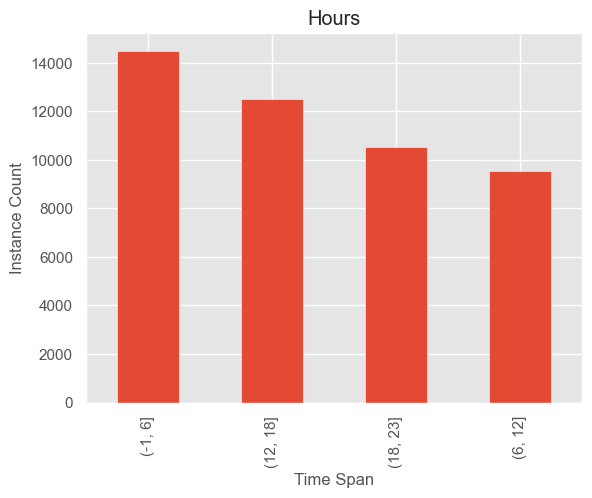

In [206]:
# Plotting the binned time with the value counts
binned_time.value_counts().plot(kind='bar')
plt.title('Hours')
plt.xlabel('Time Span')
plt.ylabel('Instance Count')
plt.show()

As we can see clearly majority of the instances are reported between 1AM-6AM and 12PM-6PM.

In [207]:
# Affixing the binned time to the dataframe
df_copy['time'] = binned_time
df_copy['time'] = df_copy['time'].cat.codes

# Creating dummies
df_dummies = pd.get_dummies(binned_time, prefix='hour')

# Dropping time column and adding the bins to our dataframe
df_copy.drop('time', inplace=True, axis=1)
df_copy = pd.concat([df_copy, df_dummies], axis=1)

df_copy.head()


,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,field_contact,offense_report,reported_hour,dif_race,dif_gender,dif_race_gender,"hour_(-1, 6]","hour_(6, 12]","hour_(12, 18]","hour_(18, 23]"
35165,36_45,unassigned,20150000087329,28462,Offense Report,NaN,7634,M,White,White,...,n,y,11,False,False,N,False,True,False,False
12817,36_45,unassigned,20150000088359,28529,Arrest,Knife/Stabbing Instrument,7634,M,White,White,...,n,n,9,False,False,N,False,True,False,False
18668,36_45,unassigned,20150000088359,28530,Field Contact,NaN,7634,M,White,Black or African American,...,y,n,9,True,False,Y,False,True,False,False
53833,18_25,unassigned,20150000088359,28531,Field Contact,NaN,7634,M,White,White,...,y,n,10,False,False,N,False,True,False,False
24467,26_35,unassigned,20150000088359,28532,Field Contact,NaN,7634,M,White,White,...,y,n,10,False,False,N,False,True,False,False


In [208]:
# Renaming the bin columns
df_copy = df_copy.rename(columns={'hour_(-1, 6]':'12am_6am', 
                          'hour_(6, 12]':'7am_12pm', 
                           'hour_(12, 18]':'1pm_6pm', 
                          'hour_(18, 23]':'7pm_11pm'})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 35165 to 12853
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         47038 non-null  object
 1   subject_id                47038 non-null  object
 2   go_sc_num                 47038 non-null  int64 
 3   terry_stop_id             47038 non-null  int64 
 4   stop_resolution           47038 non-null  object
 5   weapon_type               26911 non-null  object
 6   officer_id                47038 non-null  object
 7   officer_gender            47038 non-null  object
 8   officer_race              47038 non-null  object
 9   subject_perceived_race    47038 non-null  object
 10  subject_perceived_gender  47038 non-null  object
 11  initial_call_type         47038 non-null  object
 12  final_call_type           47038 non-null  object
 13  call_type                 47038 non-null  object
 14  arrest_flag            

In [209]:
# Let us drop the reported hour column as well
df_copy = df_copy.drop('reported_hour', axis=1)

df_copy.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,officer_age,field_contact,offense_report,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
35165,36_45,unassigned,20150000087329,28462,Offense Report,NaN,7634,M,White,White,...,38,n,y,False,False,N,False,True,False,False
12817,36_45,unassigned,20150000088359,28529,Arrest,Knife/Stabbing Instrument,7634,M,White,White,...,38,n,n,False,False,N,False,True,False,False
18668,36_45,unassigned,20150000088359,28530,Field Contact,NaN,7634,M,White,Black or African American,...,38,y,n,True,False,Y,False,True,False,False
53833,18_25,unassigned,20150000088359,28531,Field Contact,NaN,7634,M,White,White,...,38,y,n,False,False,N,False,True,False,False
24467,26_35,unassigned,20150000088359,28532,Field Contact,NaN,7634,M,White,White,...,38,y,n,False,False,N,False,True,False,False


In [210]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 35165 to 12853
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         47038 non-null  object
 1   subject_id                47038 non-null  object
 2   go_sc_num                 47038 non-null  int64 
 3   terry_stop_id             47038 non-null  int64 
 4   stop_resolution           47038 non-null  object
 5   weapon_type               26911 non-null  object
 6   officer_id                47038 non-null  object
 7   officer_gender            47038 non-null  object
 8   officer_race              47038 non-null  object
 9   subject_perceived_race    47038 non-null  object
 10  subject_perceived_gender  47038 non-null  object
 11  initial_call_type         47038 non-null  object
 12  final_call_type           47038 non-null  object
 13  call_type                 47038 non-null  object
 14  arrest_flag            

## Label Encoding
Alright we are going to use the label encoding for some of the columns. But first we will use cat codes to assign numerical categories to the categorical values.

In [211]:
# Defining a function for cat codes
def cat_codes(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes

In [212]:
# Creating a list of all the columns for label encoding
label_encoding = ['initial_call_type', 'final_call_type', 'precinct',
               'incident_year', 'officer_age', 'officer_race',
               'subject_perceived_race', 'call_type', 'sector', 'beat',
               'officer_id', 'weapon_type']

In [213]:
# Running cat codes on label_encoding
cat_codes(df_copy, label_encoding)

df_copy.head()

,subject_age_group,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_gender,officer_race,subject_perceived_race,...,officer_age,field_contact,offense_report,dif_race,dif_gender,dif_race_gender,12am_6am,7am_12pm,1pm_6pm,7pm_11pm
35165,36_45,unassigned,20150000087329,28462,Offense Report,-1,538,M,7,7,...,17,n,y,False,False,N,False,True,False,False
12817,36_45,unassigned,20150000088359,28529,Arrest,2,538,M,7,7,...,17,n,n,False,False,N,False,True,False,False
18668,36_45,unassigned,20150000088359,28530,Field Contact,-1,538,M,7,1,...,17,y,n,True,False,Y,False,True,False,False
53833,18_25,unassigned,20150000088359,28531,Field Contact,-1,538,M,7,7,...,17,y,n,False,False,N,False,True,False,False
24467,26_35,unassigned,20150000088359,28532,Field Contact,-1,538,M,7,7,...,17,y,n,False,False,N,False,True,False,False


In [214]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 35165 to 12853
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_age_group         47038 non-null  object
 1   subject_id                47038 non-null  object
 2   go_sc_num                 47038 non-null  int64 
 3   terry_stop_id             47038 non-null  int64 
 4   stop_resolution           47038 non-null  object
 5   weapon_type               47038 non-null  int8  
 6   officer_id                47038 non-null  int16 
 7   officer_gender            47038 non-null  object
 8   officer_race              47038 non-null  int8  
 9   subject_perceived_race    47038 non-null  int8  
 10  subject_perceived_gender  47038 non-null  object
 11  initial_call_type         47038 non-null  int16 
 12  final_call_type           47038 non-null  int16 
 13  call_type                 47038 non-null  int8  
 14  arrest_flag            

In [215]:
# Listing all of the columns to make dummies from
dummy = ['officer_gender', 'subject_perceived_gender', 'arrest_flag', 
           'frisk_flag', 'dif_race', 'dif_gender', 'dif_race_gender', 
           'repeat_offenders', 'subject_age_group', 'field_contact', 
         'offense_report']

# Creating and running a for loop to iterate through the dummy list and concatenate them to the dataframe
for col in dummy:
    dummies = pd.get_dummies(df_copy[str(col)], drop_first=True, prefix=f'{col}')
    df_copy = pd.concat([df_copy, dummies], axis=1)
    df_copy.drop(col, axis=1, inplace=True)
    

df_copy.head()


,subject_id,go_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_race,subject_perceived_race,initial_call_type,final_call_type,...,dif_race_gender_Y,repeat_offenders_Yes,subject_age_group_1_17,subject_age_group_26_35,subject_age_group_36_45,subject_age_group_46_55,subject_age_group_56_up,subject_age_group_Unknown,field_contact_y,offense_report_y
35165,unassigned,20150000087329,28462,Offense Report,-1,538,7,7,152,36,...,False,False,False,False,True,False,False,False,False,True
12817,unassigned,20150000088359,28529,Arrest,2,538,7,7,174,120,...,False,False,False,False,True,False,False,False,False,False
18668,unassigned,20150000088359,28530,Field Contact,-1,538,7,1,174,120,...,True,False,False,False,True,False,False,False,True,False
53833,unassigned,20150000088359,28531,Field Contact,-1,538,7,7,174,120,...,False,False,False,False,False,False,False,False,True,False
24467,unassigned,20150000088359,28532,Field Contact,-1,538,7,7,174,120,...,False,False,False,True,False,False,False,False,True,False


Ok so now before we call this a clean ready dataset and export it to csv, lets drop some columns that we are not going to need for further analysis.


In [216]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 35165 to 12853
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   subject_id                                    47038 non-null  object
 1   go_sc_num                                     47038 non-null  int64 
 2   terry_stop_id                                 47038 non-null  int64 
 3   stop_resolution                               47038 non-null  object
 4   weapon_type                                   47038 non-null  int8  
 5   officer_id                                    47038 non-null  int16 
 6   officer_race                                  47038 non-null  int8  
 7   subject_perceived_race                        47038 non-null  int8  
 8   initial_call_type                             47038 non-null  int16 
 9   final_call_type                               47038 non-null  int16 
 10 

In [217]:
# Dropping columns
cols_to_drop = ['subject_id', 'go_sc_num', 'terry_stop_id', 'stop_resolution', 'dif_race_gender_Y']
df_clean = df_copy.drop(cols_to_drop, axis=1)


df_clean.head()

,weapon_type,officer_id,officer_race,subject_perceived_race,initial_call_type,final_call_type,call_type,precinct,sector,beat,...,dif_gender_True,repeat_offenders_Yes,subject_age_group_1_17,subject_age_group_26_35,subject_age_group_36_45,subject_age_group_46_55,subject_age_group_56_up,subject_age_group_Unknown,field_contact_y,offense_report_y
35165,-1,538,7,7,152,36,3,0,3,11,...,False,False,False,False,True,False,False,False,False,True
12817,2,538,7,7,174,120,2,0,3,10,...,False,False,False,False,True,False,False,False,False,False
18668,-1,538,7,1,174,120,2,0,3,10,...,False,False,False,False,True,False,False,False,True,False
53833,-1,538,7,7,174,120,2,0,3,10,...,False,False,False,False,False,False,False,False,True,False
24467,-1,538,7,7,174,120,2,0,3,10,...,False,False,False,True,False,False,False,False,True,False


In [218]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47038 entries, 35165 to 12853
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   weapon_type                                   47038 non-null  int8 
 1   officer_id                                    47038 non-null  int16
 2   officer_race                                  47038 non-null  int8 
 3   subject_perceived_race                        47038 non-null  int8 
 4   initial_call_type                             47038 non-null  int16
 5   final_call_type                               47038 non-null  int16
 6   call_type                                     47038 non-null  int8 
 7   precinct                                      47038 non-null  int8 
 8   sector                                        47038 non-null  int8 
 9   beat                                          47038 non-null  int8 
 10  incident_ye

## Exporting to CSV
We are done with cleaning, feature engineering and preprocessing the dataset. Let us export it to a new CSV file.

In [221]:
# # Exporting to csv file
df_clean.to_csv('data/clean_Terry_stops_dummies.csv', index=False)

print('Data exported to clean_data.csv successfully.')

Data exported to clean_data.csv successfully.
